## Support Vector Machines

We are now going to do a general support vector machine before we start to look at the various kernels that are avaliable for the classification:

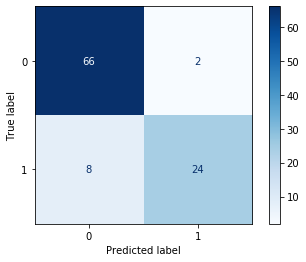

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
sc_x = StandardScaler()

dataset = pd.read_csv('data\Social_Network_Ads.csv')
y = dataset.iloc[:,-1]
x = dataset.iloc[:,2:4]
x = sc_x.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
from sklearn.svm import SVC

sv_class = SVC(random_state=0,kernel='linear')
sv_class.fit(x_train,y_train)
plot_confusion_matrix(sv_class,x_test,y_test,cmap='Blues')

## Kernel SVM

Now as we may know it is not always applicable to fit the same relationship to different data set as some of them have very different relationships.

This is where Kernel SVM fits in it will fit a SVM model with different relationships to the data. Let's have a look at functions in SVM that we can fit:

* RBF (Gaussian Kernel
 * the default non parametric function that fits a multi dimensional space to the data which helps if one group is encased by the other group.
* Sigmoid Kernel
 * You are fitting an S curve to the data.
* Polynomial Kernels
 * We fit a polynomial to the data (Like in Polynomial regression).
 
Let's now fit one of the Other Kernel's to our data:
 

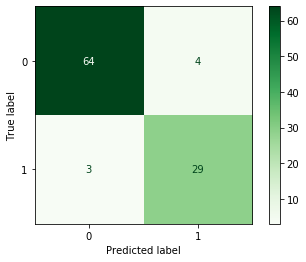

In [48]:
 
sv_class2 = SVC(random_state=0,kernel='rbf')
 
sv_class2.fit(x_train,y_train)
plot_confusion_matrix(sv_class2,x_test,y_test,cmap='Greens')

from the results we can see that although we have a drop in the correct classification for not buying the vehicle the number of correct classifications for will buy has increased.

## Naive Bayes

The next analysis technique we will look at is how to do Naive Bayes in Python. This method will use the same data sets as previously.

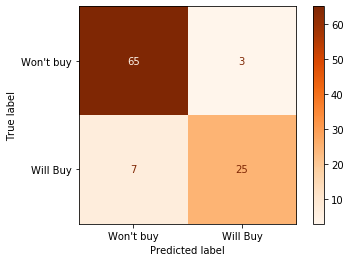

In [49]:
from sklearn.naive_bayes import GaussianNB

classiferNB=GaussianNB()

classiferNB.fit(x_train,y_train)
plot_confusion_matrix(classiferNB,x_test,y_test,cmap='Oranges',display_labels=['Won\'t buy','Will Buy'])

## Evaluation of Classification Models

When we started looking at classification models we generally accept that if we are working with probabilities then a 0.5 and below probability will be classified as a no / 0 and above 0.5 will be a yes or 1.

We will generally find that we will have False Positives and Negatives predicted in our models:

* A false positive is a Type one Error
 * Predicted that someone will say Yes but it was actually a no
* A false Negative is a Type two Error
 * Predicted that someone will say No but it was actually a Yes

The extremity of the error differs usually we need to look at the cases as we don't always want to predict something won't happen when it does.

### Confusion Matrix

We have seen the confusion Matrix with most of the classifiers we have used with very little explanation. If we consider that the Confusion matrix is a way for us to graphically represent our correct predictions verus Type I and Type II Errors.

Type I Errors are in Top Right of the confusion Matrix, Type II Errors are in the bottom Left (These are for a 2 x 2 Confusion Matrix).

The Diagonal is the correct Predictions.

### Accuracy Paradox

Let's look at an example. We have a sample of 10 000 - which we have predicted and have correctly predicted 9800 = 98% Accuracy

We take the same scenario with 150 Type I errors and 50 Type II Errors and go with the assumption that we are going to abandon the model and have everyone predicted as not buying:
* as Type I error is a false positive the 150 is added to 9700 meaning that we can say the accuracy is 9850/10000 = 98,5%

This means that by not using the model the accuracy rate has gone up.

**So we should use caution when we use accuracy for model selection**

### Cap Curve

This is also know as the cumulative accuracy profile.

To calculate this we know what the general overall response rate so for instance if we know 10% will resond we can guess that if 20 000 receive a message then 2000 will respond.

With the CAP Curve we are looking for our model to offer efficiencies above a general feeling of the responses so if we use the example from above we want our model to have a more targeted approach so as we approach people we should have more than 10% response rate as then we have a model that gives us more of an advantage with how we target our audience.

Let's do a quick chart to show the various options:

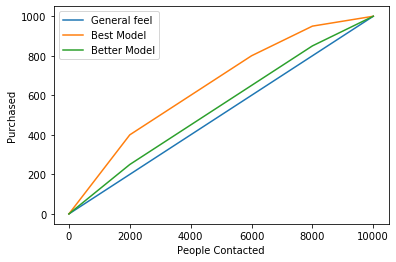

In [50]:
import matplotlib.pyplot as plt
x_ordinary = pd.DataFrame([0,2000,4000,6000,8000,10000])
y_best = pd.DataFrame([0,400,600,800,950,1000])
y_better = pd.DataFrame([0,250,450,650,850,1000])


plt.plot(x_ordinary,x_ordinary*0.1,label='General feel')
plt.plot(x_ordinary,y_best,label='Best Model')
plt.plot(x_ordinary,y_better,label='Better Model')
plt.legend()
plt.xlabel('People Contacted')
plt.ylabel('Purchased')
plt.show()

from the graph above we can see that we have a general perception that we will have 10% purchase rate with the people we reach out to. We have a "Best" model which allows us to reach the same peopl at a higher percentage of purchase and a model in between which still increases the sales but not as well as the best model.

just a quick note - the data still has a limitation of the ten percent so the maximum we can reach is 1000 purchases.

We also have a crystal ball line - the ideal would be to know exactly which ten percent to reach and hit the line immediately, so reach the exact 1000 people to get a 100% purchase success rate.

We also have a ROC which is the Receiver Operating Characteristic which is not the same thing.

# Clustering:

## K-Means Clustering:

Creates groupings for us based on the variables we input, we go through the following steps for it:

* Decide on the number of Clusters
* Decide at random K points that are the centroid for the clusters
* Assign each data point to each closest centroid
* Compute and place the new centroid of each cluster
* Reassign each data point to the new closest centroid (If re-assignment took place loop from step 4)

Determining the Number of clusters:

We use the Within Clusters Sum of Squares to determine the ideal number of squares. The maximum number of clusters we can have is equal to the number of data points we have in our data set. We don't have a hard rule for what is an ideal WCS value but rather we should be looking at the drop in the WCSS as we increase the number of clusters.

The method we use is the Elbow method - we look for the point where the drop is substantial to not substancial

Let's have a look at an example of this:

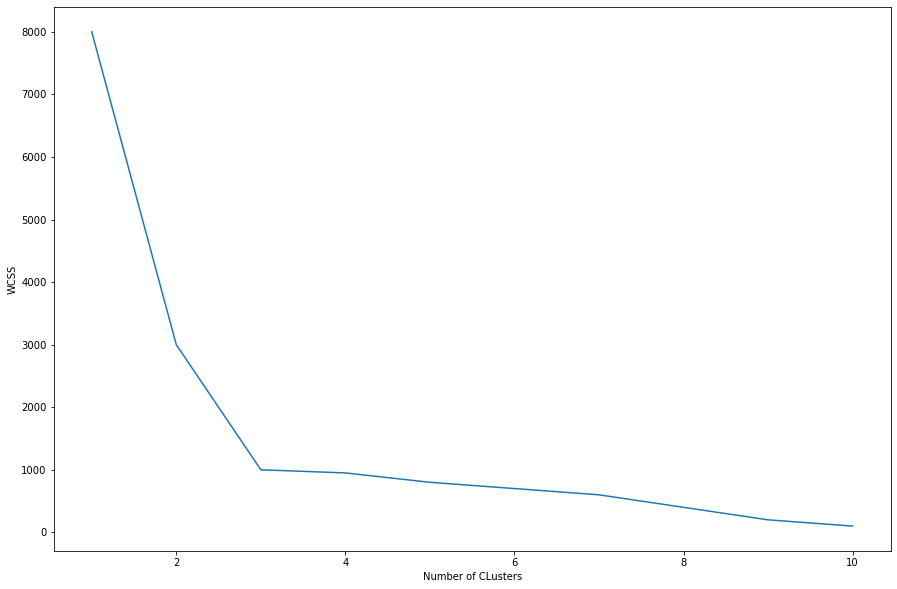

In [51]:
WCSS_x = [1,2,3,4,5,6,7,8,9,10]
WCSS_Y=[8000,3000,1000,950,800,700,600,400,200,100]

plt.figure(figsize=(15,10))
plt.plot(WCSS_x,WCSS_Y)
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

From the example chart we can say that the elbow point is at 3 clusters and this should be the maximum we use.

The example dataset we will be using is based on looking at different customers and

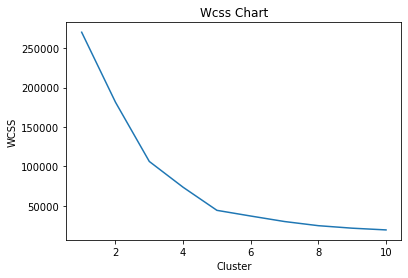

In [52]:
dataset = pd.read_csv('data\Mall_Customers.csv')

dataset.describe()

x = dataset.iloc[:,3:]

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Wcss Chart")
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.show()

We can see 5 clusters seems to be an ideal cut off.

So let's now fit the Kmeans with 5 clusters

In [53]:
kmeans = KMeans(n_clusters=5,random_state=0)
y_kmeans=kmeans.fit_predict(x)

Let's now have a scatter plot of the observations:

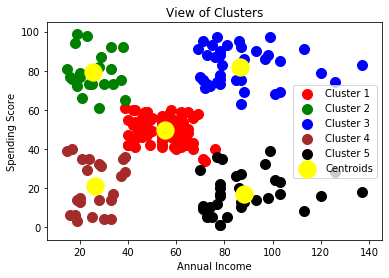

In [54]:
plt.scatter(x.iloc[y_kmeans==0,0],x.iloc[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x.iloc[y_kmeans==1,0],x.iloc[y_kmeans==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(x.iloc[y_kmeans==2,0],x.iloc[y_kmeans==2,1],s=100,c='blue',label='Cluster 3')
plt.scatter(x.iloc[y_kmeans==3,0],x.iloc[y_kmeans==3,1],s=100,c='brown',label='Cluster 4')
plt.scatter(x.iloc[y_kmeans==4,0],x.iloc[y_kmeans==4,1],s=100,c='black',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("View of Clusters")
plt.show()

## Hierarchical Clustering

